## Universal Bank


La fel ca orice instituție, afacere sau companie, și băncile își analizează constant baza de clienți.
Acest caz este despre o bancă (Universal Bank) care are o bază de clienți în creștere. Majoritatea acestor clienți sunt clienți deponenți cu valori diferite ale depozitelor. Numărul de clienți care sunt și debitori (clienți care se împrumută) este destul de mic, iar banca este interesată să extindă rapid această bază pentru a aduce mai multe împrumuturi crescând din dobandă câștigurile. Strategia băncii este de a explora modalități de atragere a clienților să acceseze credite de nevoi personale (personal loan). O campanie pe care banca a derulat-o anul trecut pentru clienții cu depozite a arătat o rată de conversie de peste 9% de succes.   
În continuare departamentul dorește să construiască un **model care să îi ajute să identifice potențialii clienți care au o probabilitate mai mare de a achiziționa creditul de nevoie personale**.



Semnificația variabilelor din setul de date:\
**ID**: ID-ul clientului\
**Age**: vârsta clientului\
**Experience**: numărul de ani de experiență profesională\
**Income**: venitul anual al clientului (mii de dolari)\
**ZIPCode**: codul poștal - adresa\
**Family**: mărimea familiei clientului\
**CCAvg**: media cheltuielilor pe cardul de credit pe lună (mii de dolari)\
**Eduation**: nivelul educației. 1-studii liceale, 2-studii universitare, 3-studii postuniversitare\
**Mortgage**: valoarea creditului ipotecar (mii de dolari)\
**Securities Account**: clientul are/nu are un cont de valori mobiliare deschis la bancă\
**CD Account**: clientul are/nu are un depozit la bancă\
**Online**: clientul are/nu are acces la Internet banking\
**CreditCard**: clientul are/nu are un card de credit de la Universal Bank


**Personal Loan**: clientul a acceptat/nu a acceptat oferta de împrumut personal



### Importarea bibliotecilor

Importăm toate bibliotecile pe care le vom folosi pe parcursul acestui proiect.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pickle

### Citirea setului de date

In [2]:
df=pd.read_csv('UniversalBank.csv')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

### Explorarea setului de date

Începem explorarea setului de date prin aflarea dimenisiunii acestuia, tipului variabilelor și a unor date statistice corespunzătoare variabilelor.

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

Alegem să ștergem variabilele 'ID' și 'ZIP Code' pentru că nu aduc informație relevantă în problema pe care trebuie să o rezolvăm.

In [6]:
df.drop(['ZIP Code','ID'], axis=1, inplace=True)

Aflăm câte valori unice are fiecare variabilă. Acest lucru ne va ajuta mai departe să ne dăm seama care dintre variabile sunt categorice și care continue.

In [7]:
df.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Din numărătoarea anterioară ne putem da seama ușor că toate variabilele cu un număr de valori <5 sunt variabile categorice, iar restul sunt continue, apoi le separăm.

In [8]:
categorical=[col for col in df.columns if df[col].nunique()<=5]
continous=[col for col in df.columns if df[col].nunique()>5]

In [9]:
categorical

['Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [10]:
continous

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

Explorăm variabilele categorice cu ajutorul unor reprezentări grafice de tip countplot, formându-ne o idee despre proporția acelor variabile în setul de date. 
De notat este faptul că variabila 'Personal Loan' este dezechilibrată-sunt foarte mulți cei care nu vor solicita un împrumut personal și foarte puțini cei care o vor face.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

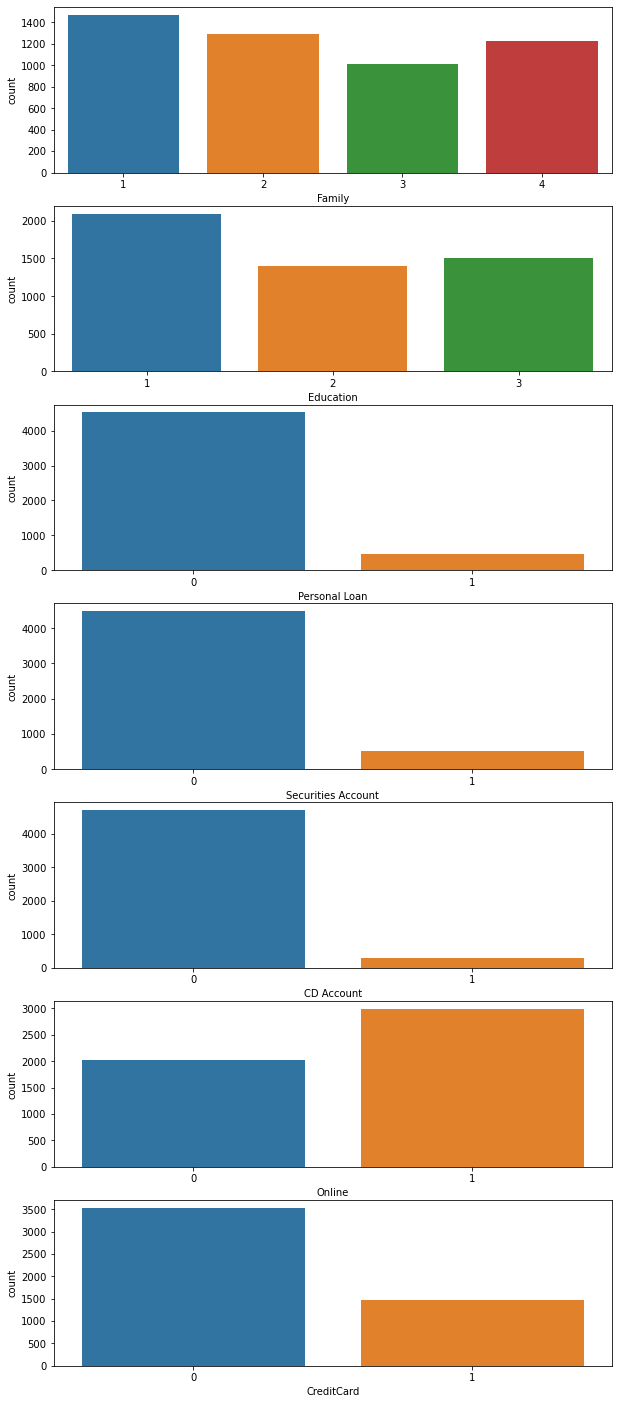

In [11]:
plt.figure(figsize=(10,25))
for i,col in enumerate(categorical):
    plt.subplot(7,1,i+1)
    sns.countplot(df[col])

La fel ca mai sus, de data aceasta explorăm variabilele continue cu ajutorul unor reprezentări grafice de tip histograme.

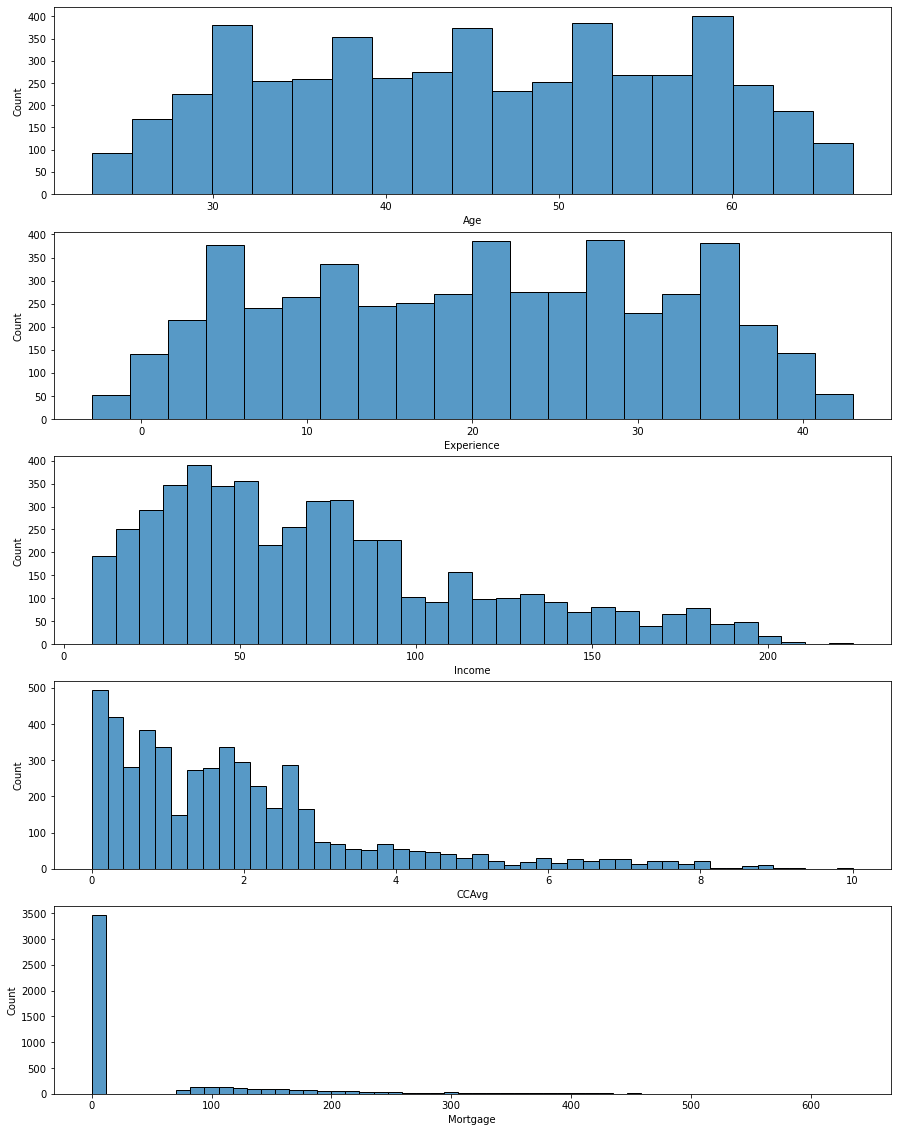

In [12]:
plt.figure(figsize=(15,20))
for i,col in enumerate(continous):
    plt.subplot(5,1,i+1)
    sns.histplot(df[col])

### Pregătirea setului de date

Din histogramele de mai sus descoperim ceva în neregulă la variabila 'Experience' și anume existența unor valori mai mici decât 0, ceea ce nu prea are sens în viața reală. Nu poate spune nimeni că are o experiență de muncă de -2 ani, de exemplu. Astfel decidem să ștergem toate rândurile în care experiența are valori negative, după care vedem câte rânduri ne-au mai rămas din setul de date. 

In [13]:
df=df[df['Experience']>=0]
df.shape

(4948, 12)

Verificăm dacă variabilele continue prezintă outlieri (valori anormale în raport cu majoritatea valorilor) cu ajutorul reprezentării grafice de tip boxplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

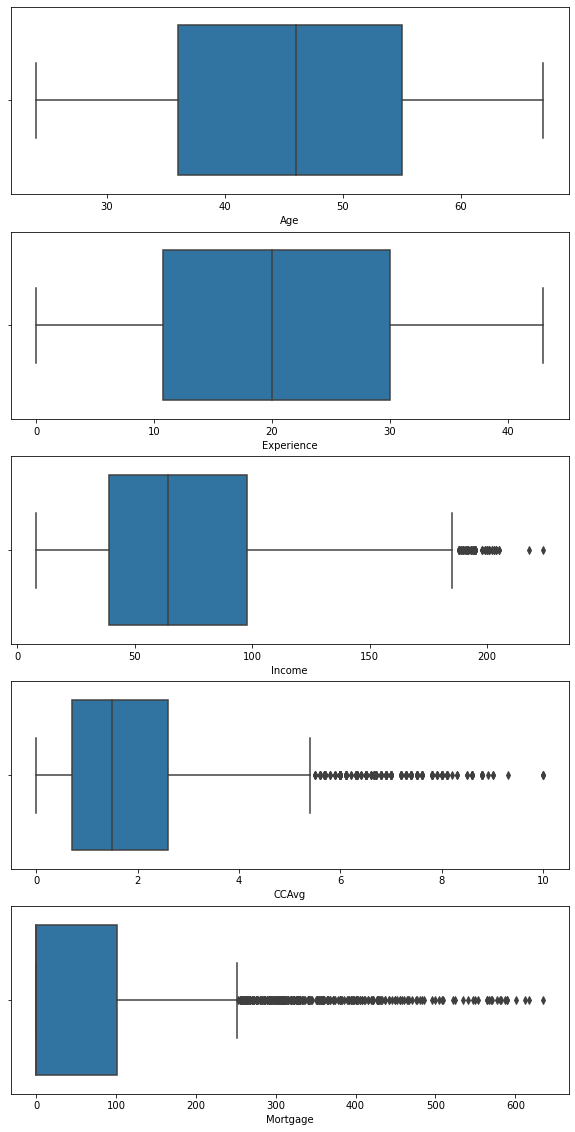

In [14]:
plt.figure(figsize=(10,20))
for i,col in enumerate(continous):
    plt.subplot(5,1,i+1)
    sns.boxplot(df[col])


Observăm că sunt câteva variabile care au valori anormale. Valorile anormale sunt considerate cele mai mici decât Q1-1.5 * IQR sau cele mai mari decât Q3+1.5 * IQR. Pentru a le elimina creăm funcția 'eliminare_outlieri'.

In [15]:
def eliminare_outlieri(df, coloane):
    for coloana in coloane:
        print('Se lucreaza la coloana: {}'.format(coloana))
        
        Q1=df[coloana].quantile(0.25)
        Q3=df[coloana].quantile(0.75)
        IQR=Q3-Q1
        min=Q1-1.5*IQR
        max=Q3+1.5*IQR
        
        df = df[(df[coloana]>=min) & (df[coloana] <= max)]
    return df

In [16]:
df=eliminare_outlieri(df,df[continous])
df.shape

Se lucreaza la coloana: Age
Se lucreaza la coloana: Experience
Se lucreaza la coloana: Income
Se lucreaza la coloana: CCAvg
Se lucreaza la coloana: Mortgage


(4333, 12)

După eliminarea outlierilor rămâne un set de date cu un total de 4333 de rânduri.

In [17]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4333 rows x 12 columns]

#### Multicoliniaritate

Multicoliniaritatea presupune aflarea coeficienților de coreelație dintre variabile și eliminarea unor variabile atunci când acesta sunt puternic corelate cu alte variabile. Eliminarea unor variabile în cazul acesta duce la optimizarea modelelor.

<AxesSubplot:>

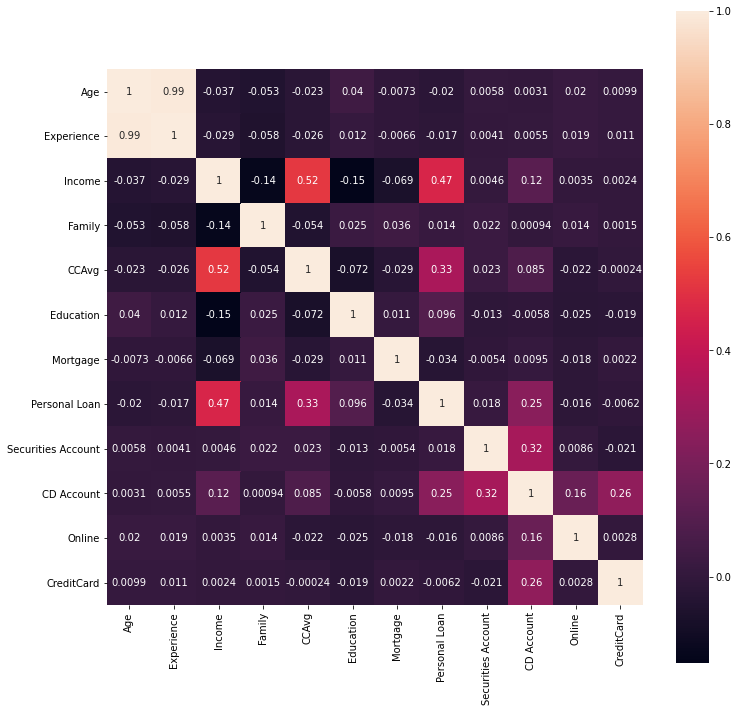

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, square=True)

Din heatmapul de mai sus descoperim că 'Age' și 'Experience' sunt puternic corelate, motiv pentru care vom alege să eliminăm variabila 'Experience'.

In [19]:
df.drop('Experience',axis=1,inplace=True)
df.shape

(4333, 11)

#### Separarea variabilelor

Separarea variabilelor face parte din pregătirea setului de date pentru antrenare. Salvăm în X totalitatea variabilelor independente și în y variabila dependentă, 'Personal Loan'.

In [20]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

Verificăm raportul valorilor din variabila dependentă,

In [21]:
y.value_counts()

0    4063
1     270
Name: Personal Loan, dtype: int64

#### Echilibrarea setului de date

Pentru că variabila y a setului de date este puternic dezechilibrată, adică numărul persoanelor care ar accesa un credit personal este mult mai mic față de numărul persoanelor care nu ar face asta, tragem concluzia că setul este dezechilibrat. Acest lucru poate cauza unele probleme: modelele ar putea învăța și apoi prezice pe date noi clasa cea mai des întâlnită în etapa de antrenare. Există posibilitatea de echilibrare a setului de date prin supraeșantionare, cu ajutorul <b>SMOTE (Synthetic Minority Oversampling Technique)</b>.\
SMOTE este una dintre cele mai frecvent utilizate metode de supraeșantionare pentru a rezolva problema dezechilibrului.
Acesta își propune să echilibreze distribuția claselor prin creșterea aleatorie a exemplelor de clase minoritare prin replicarea acestora.\
SMOTE sintetizează noi instanțe din clasa minoritară, genereazând înregistrări virtuale de antrenament prin interpolare liniară a datelor din clasa minoritară. Aceste înregistrări de antrenament sintetice sunt generate prin selectarea aleatorie a unuia sau mai multor vecini k-cel mai apropiat pentru fiecare exemplu din clasa minoritară. După procesul de supraeșantionare, datele sunt reconstruite și pot fi aplicate mai multe modele de clasificare pentru datele prelucrate.

In [22]:
!pip install imbalanced-learn==0.7.0

Creăm o instanță a SMOTE() și supraeșantionăm setul de date (X și y), iar apoi verificăm să fie același număr de valori de '0' și de '1'.

In [23]:
from imblearn.over_sampling import SMOTE
supraesantionare=SMOTE()
X_SMOTE, y_SMOTE = supraesantionare.fit_resample(X, y)

y_SMOTE.value_counts()

1    4063
0    4063
Name: Personal Loan, dtype: int64

In [24]:
X_SMOTE.shape

(8126, 10)

#### Împărțirea setului de date

Împărțirea setului de date este importantă înainte de modelarea propriu zisă. Aici se împarte setul de date în seturi de antrenare și seturi de test. Vom aplica împărțirea setului de date atât pe seturile originale de date, cât și pe cele supraeșantionate.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, train_size=0.7, test_size=0.3, random_state=100)

#### Scalarea setului de date

Scalarea valorilor este o idee bună în modelarea datelor, în special în cazul regresiei. Scalarea datelor facilitează învățarea unui model. 
Vom aplica scalarea atât pe seturile originale de date, cât și pe cele supraeșantionate.

In [26]:
sc = StandardScaler()
X_sc_train=sc.fit_transform(X_train)
X_sc_test= sc.transform(X_test)

X_sc_SMOTE_train=sc.fit_transform(X_SMOTE_train)
X_sc_SMOTE_test= sc.transform(X_SMOTE_test)

### Antrenarea modelelor

Fiindcă ne dorim să obținem cel mai bun model pentru rezolvarea problemei noastre de clasificare alegem să comparăm rezultatele mai multor modele cum ar fi: Regresia Logistică, Arborii de decizie și Random Forest.\
Le vom aborba în continuare pe rând, aflând pentru fiecare în parte acuratețea pe care acestea o oferă în patru cazuri: cu setul de date original, cu setul de date supraeșantionat, cu setul de date scalate, cu setul de date scalate și supraeșantionat.
Pentru fiecare algoritm scriem câte o funcție, ceea ce ușurează procesul de antrenare pe diferite seturi de date (caz în care se schimbă doar parametri).

#### Regresia logistică

In [27]:
def regresie_logistica(X_train, y_train, X_test, y_test):
    logmodel = LogisticRegression(max_iter=500)
    logmodel.fit(X_train,y_train)
    pred=logmodel.predict(X_test)
    acc=accuracy_score(y_test, pred)
    #print('Acuratetea modelului : {}'.format(acc))
    return acc

In [28]:
acc_logmodel=regresie_logistica(X_train, y_train, X_test, y_test)
acc_logmodel_SMOTE=regresie_logistica(X_SMOTE_train, y_SMOTE_train, X_SMOTE_test, y_SMOTE_test)
acc_logmodel_sc=regresie_logistica(X_sc_train, y_train, X_sc_test, y_test)
acc_logmodel_sc_SMOTE=regresie_logistica(X_sc_SMOTE_train, y_SMOTE_train, X_sc_SMOTE_test, y_SMOTE_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [29]:
print(acc_logmodel, acc_logmodel_SMOTE, acc_logmodel_sc, acc_logmodel_sc_SMOTE)

0.9661538461538461 0.918785890073831 0.9653846153846154 0.9200164068908941


#### Arbori de decizie

In [30]:
def arbori_decizie(X_Train, y_Train, X_Test, y_Test):
        dt=DecisionTreeClassifier(random_state=123)
        modeldt=GridSearchCV(dt,verbose=3,param_grid={'max_depth':range(5,20),
                                                      'criterion':['gini','entropy'], 
                                                      'min_samples_leaf':range(1,6), 
                                                      'min_samples_split':range(2,11)})
        modeldt.fit(X_Train,y_Train)
        predict=modeldt.predict(X_Test)
        acc=accuracy_score(y_Test, predict)
        print('Acuratetea modelului cu parametri {}: {}'.format(modeldt.best_params_, acc))
        return acc

In [31]:
acc_dt=arbori_decizie(X_train, y_train, X_test, y_test)
acc_dt_SMOTE=arbori_decizie(X_SMOTE_train, y_SMOTE_train, X_SMOTE_test, y_SMOTE_test)
acc_dt_sc=arbori_decizie(X_sc_train, y_train, X_sc_test, y_test)
acc_dt_sc_SMOTE=arbori_decizie(X_sc_SMOTE_train, y_SMOTE_train, X_sc_SMOTE_test, y_SMOTE_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.987, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.970, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.982, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.992, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.980, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples

[Parallel(n_jobs=1)]: Done 6750 out of 6750 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Acuratetea modelului cu parametri {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}: 0.9784615384615385
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.950, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.952, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.950, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV] 

[Parallel(n_jobs=1)]: Done 6750 out of 6750 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Acuratetea modelului cu parametri {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}: 0.9848236259228876
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.987, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.970, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.982, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.992, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV] 

[Parallel(n_jobs=1)]: Done 6750 out of 6750 | elapsed:   34.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Acuratetea modelului cu parametri {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}: 0.9784615384615385
Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.950, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.952, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.950, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV] 

[Parallel(n_jobs=1)]: Done 6750 out of 6750 | elapsed:  1.1min finished


In [32]:
print(acc_dt, acc_dt_SMOTE, acc_dt_sc, acc_dt_sc_SMOTE)

0.9784615384615385 0.9848236259228876 0.9784615384615385 0.9856439704675964


Reprezentarea grafică a unui arbore de decizie se poate realiza cu ajutorul bibliotecii *tree* din sklearn, unde arborele de decizie reprezentat este cel aflat anterior ca fiind cel care oferă cea mai mare acuratețe.

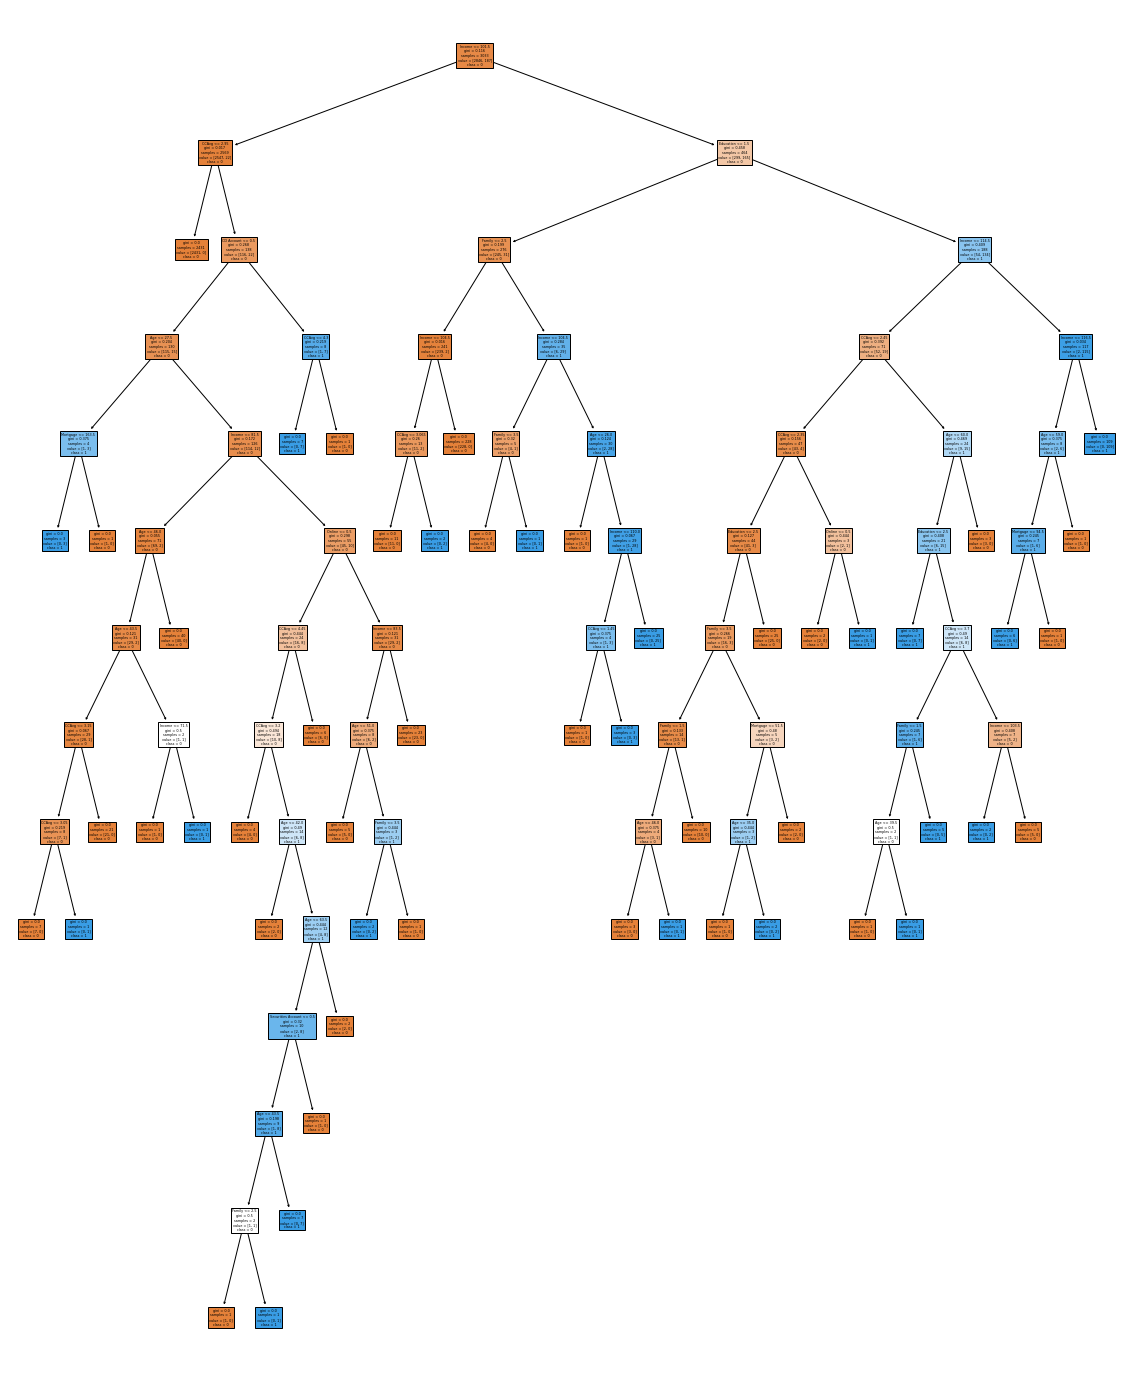

In [33]:
DTC=DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2,criterion='gini', random_state=123)
DTC.fit(X_train,y_train)

fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(DTC,
                   feature_names=X_train.columns,
                   class_names=['0', '1'],
                   filled=True)

#### Random Forest

In [34]:
def random_forest(X_Train, y_Train, X_Test, y_Test):
        rf=RandomForestClassifier(random_state=123)
        modelrf=GridSearchCV(rf,verbose=3,param_grid={'max_depth':range(5,20),
                                                      'criterion':['gini','entropy'], 
                                                      'min_samples_leaf':range(1,6), 
                                                      'min_samples_split':range(2,11)})
        modelrf.fit(X_Train,y_Train)
        predict=modelrf.predict(X_Test)
        print('Acuratetea modelului cu parametri {}: {}'.format(modelrf.best_params_,accuracy_score(y_Test, predict)))

In [35]:
# Atenție! Poate dura și 2 ore!
acc_rf=random_forest(X_train, y_train, X_test, y_test)
acc_rf_SMOTE=random_forest(X_SMOTE_train, y_SMOTE_train, X_SMOTE_test, y_SMOTE_test)
acc_rf_sc=random_forest(X_sc_train, y_train, X_sc_test, y_test)
acc_rf_sc_SMOTE=random_forest(X_sc_SMOTE_train, y_SMOTE_train, X_sc_SMOTE_test, y_SMOTE_test)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.982, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.970, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.984, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.988, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.975, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.980, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.969, total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.987, total=   0.3s
[CV] cr

KeyboardInterrupt: 

In [ ]:
print(acc_rf, acc_rf_SMOTE, acc_rf_sc, acc_rf_sc_SMOTE)

### Compararea modelelor

Am creat mai sus mai multe modele (Regresia Logistică, Arbori de decizie, Random Forest) utilizând mai multe seturi de date (seturi scalate, nescalate sau supraeșantionate). Acuratețea obținută pentru fiecare model în parte trebuie comparată pentru ca la final să decidem care model este cel mai potrivit. Un mod simplu de a compara acuratețile obținute pe parcursul antrenării este prin a forma un dataframe, sub forma unui tabel.

In [ ]:
df_compare = pd.DataFrame([[acc_logmodel, acc_logmodel_SMOTE, acc_logmodel_sc, acc_logmodel_sc_SMOTE],
                           [acc_dt, acc_dt_SMOTE, acc_dt_sc, acc_dt_sc_SMOTE],
                           [acc_rf, acc_rf_SMOTE, acc_rf_sc, acc_rf_sc_SMOTE]],
    columns=['Acuratete model','Acuratete model supraesantionat','Acuratete model scalat', 'Acuratete model supraesantionat si scalat'],
                       index=['Regresia Logistică','Arbori de decizie',' Random Forest'])
df_compare


Obținem astfel că modelul cu cea mai mare acuratețe este unul Random Forest.  
Cu toate acestea, la alegerea finală a modelului trebuie să ținem cont și de resursele pe care modelul le consumă. De exemplu, diferența de acuratețe dintre Arborii de decizie și Random Forest nu este foarte mare, insă timpul de antrenament petrecut este semnificativ mai mare în cazul Random Forest, motiv pentru care indicat ar fi să alegem ca model final modelul Arbori de decizie cu seturile scalate si supraeșantionate. Îl antrenăm din nou cu parametri obținuți mai devreme.

In [ ]:
model_final=DecisionTreeClassifier(criterion=entropy, max_depth=16, min_samples_leaf= 1, min_samples_split=2, random_state=123)
model_final.fit(X_sc_SMOTE_train, y_SMOTE_train)

### Pickle

Biblioteca pickle este un modul în Python care permite serializarea și deserializarea obiectelor. Serializarea este procesul de conversie a unei ierarhii de obiecte într-un flux de octeți, în timp ce deserializarea este procesul de recreare a ierarhiei obiectului dintr-un flux de octeți.

Biblioteca Pickle este foarte utilă atunci când se dorește salvarea unui obiect într-un fișier sau transmiterea lui printr-o rețea, deoarece reprezentarea în octeți a obiectului poate fi ușor stocată sau transmisă. Pentru a utiliza biblioteca pickle, mai întâi trebuie importată folosind import pickle. Apoi, puteți utiliza funcția pickle.dump() pentru a serializa un obiect și funcția pickle.load() pentru a-l deserializa.

Pentru a salva modelul ales anterior folosind Pickle, tot ce trebuie să facem este să trecem obiectul model (în cazul nostru model_final) în funcția dump() a lui Pickle. Acest lucru va serializa obiectul și îl va converti într-un „flux de octeți” pe care îl putem salva ca fișier numit model.pkl. Modelul salvat în fișierul model.pkl poate rula pe date de testare nevăzute, fără a fi nevoie de o nouă antrenare a modelul de la zero.

In [ ]:
pickle.dump(rf, open('model.pkl', 'wb'))

Pentru a încărca un model salvat dintr-un fișier Pickle, tot ce trebuie făcut este trecerea modelului „pickle”  (model.pkl) în funcția Pickle load() și acesta va fi deserializat. Atribuind acest lucru înapoi unui obiect model, se poate rula apoi funcția predict() a modelului original.
(Se poate testa și într-un notebook separat)

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)